In [83]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

#https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022


# Loading international- matches dataset 

In [84]:
df = pd.read_csv('international_matches.csv')
#df1 = pd.read_csv('players_22.csv')
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

## Analyzing dataset types / counting 

In [85]:
df.dtypes.count()

25

In [63]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
countries = df.groupby('home_team')['date'].count()
countries

home_team
Afghanistan        36
Albania           131
Algeria           159
American Samoa     17
Andorra            97
                 ... 
Vietnam           120
Wales             129
Yemen              87
Zambia            180
Zimbabwe          135
Name: date, Length: 211, dtype: int64

In [65]:
df.home_team.value_counts()

Mexico                      316
USA                         314
Japan                       280
Saudi Arabia                272
Korea Republic              249
                           ... 
Timor-Leste                  16
Tonga                        15
Anguilla                     13
Cook Islands                 10
Turks and Caicos Islands      8
Name: home_team, Length: 211, dtype: int64

In [66]:
df.away_team.value_counts()

Zambia                      243
Costa Rica                  217
Paraguay                    216
Sweden                      206
Mexico                      201
                           ... 
Bahamas                      20
Turks and Caicos Islands     18
Montserrat                   18
American Samoa               14
Samoa                        14
Name: away_team, Length: 211, dtype: int64

In [67]:
df.groupby('tournament')['date'].sum()

tournament
ABCS Tournament                               2011-12-022011-12-042012-07-132012-07-152013-1...
AFC Asian Cup                                 1996-12-041996-12-041996-12-051996-12-051996-1...
AFC Asian Cup qualification                   1996-01-241996-01-261996-01-281996-01-301996-0...
AFC Challenge Cup                             2006-04-012006-04-012006-04-022006-04-022006-0...
AFC Challenge Cup qualification               2008-04-022008-04-042008-04-042008-04-062008-0...
                                                                    ...                        
USA Cup                                       1995-06-111995-06-171995-06-181995-06-211995-0...
United Arab Emirates Friendship Tournament    1994-02-021994-02-021994-02-041994-02-041994-0...
VFF Cup                                       2008-10-282008-10-302008-11-162010-11-022010-1...
WAFF Championship                             2000-05-232000-05-232000-05-242000-05-242000-0...
Windward Islands Tournament  

# Filtering qualified countries 



* Only 31 teams qualified 
* Filtering for away and home team 

In [68]:
filtercountry = "Qatar" ,"Ecuador", "Senegal", "Netherlands" ,"England", "IR Iran" , "USA" , "Wales",  "Argentina" , "Saudi Arabia",  "Mexico", "Poland",  "France" ,"Australia", "Denmark" ,"Tunisia" , "Spain" , "Costa Rica",  "Germany", "Japan" , "Belgium",  "Canada",  "Morocco",  "Croatia",  "Brazil",  "Serbia",  "Switzerland",  "Cameroon",  "Portugal",  "Ghana",  "Uruguay", "Korea Republic"

In [69]:
df.loc[(df['home_team'] == 'IR Iran' )] # test for checking each countries 

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
93,1993-10-16,IR Iran,Korea Republic,Asia,Asia,58,36,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,1993-10-22,IR Iran,Iraq,Asia,Asia,59,64,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,1993-10-25,IR Iran,Korea DPR,Asia,Asia,59,58,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1437,1996-05-17,IR Iran,Qatar,Asia,Asia,118,84,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1534,1996-06-10,IR Iran,Nepal,Asia,Asia,122,146,0,0,8,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23119,2021-10-12,IR Iran,Korea Republic,Asia,Asia,22,36,1538,1479,1,...,No,Draw,73.0,75.0,69.0,75.3,69.0,73.0,80.0,73.8
23417,2022-01-27,IR Iran,Iraq,Asia,Asia,21,75,1557,1333,1,...,No,Win,73.0,NaN,69.0,75.3,69.0,NaN,NaN,NaN
23447,2022-02-01,IR Iran,United Arab Emirates,Asia,Asia,21,69,1557,1350,1,...,No,Win,73.0,70.0,69.0,75.3,69.0,63.0,64.3,67.0
23580,2022-03-29,IR Iran,Lebanon,Asia,Asia,21,95,1572,1228,2,...,No,Win,73.0,NaN,69.0,75.3,69.0,NaN,NaN,NaN


## Concat 2 datasets created qualified teams


In [70]:
dfhome = df[df['home_team'].isin(filtercountry)]
dfaway = df[df['away_team'].isin(filtercountry)]
newdf = pd.concat((dfhome, dfaway))
newdf.drop_duplicates()
newdf.count()

date                             11296
home_team                        11296
away_team                        11296
home_team_continent              11296
away_team_continent              11296
home_team_fifa_rank              11296
away_team_fifa_rank              11296
home_team_total_fifa_points      11296
away_team_total_fifa_points      11296
home_team_score                  11296
away_team_score                  11296
tournament                       11296
city                             11296
country                          11296
neutral_location                 11296
shoot_out                        11296
home_team_result                 11296
home_team_goalkeeper_score        5759
away_team_goalkeeper_score        5634
home_team_mean_defense_score      5696
home_team_mean_offense_score      5902
home_team_mean_midfield_score     5841
away_team_mean_defense_score      5595
away_team_mean_offense_score      5809
away_team_mean_midfield_score     5732
dtype: int64

In [71]:
#newdf.groupby('home_team')['date'].count()
qa = newdf.loc[(df['home_team'] == 'Qatar' )]
qa.groupby(["tournament"])["date"].count()


tournament
AFC Asian Cup                    13
AFC Asian Cup qualification      16
Arab Cup                         11
Copa América                      2
FIFA World Cup qualification     60
Friendly                        145
Gold Cup                          2
Gulf Cup                         31
King's Cup                        3
WAFF Championship                 5
Name: date, dtype: int64

# Filtering important competitions 
* Get only FIFA and UEFA competitions

In [72]:
newdf.groupby('tournament')['date'].count() # Checking all the competitions played 

tournament
AFC Asian Cup                                  186
AFC Asian Cup qualification                    122
African Cup of Nations                         273
African Cup of Nations qualification           262
African Nations Championship                    58
African Nations Championship qualification      10
Amílcar Cabral Cup                              17
Arab Cup                                        35
CONCACAF Nations League                         29
CONCACAF Nations League qualification            3
CONMEBOL–UEFA Cup of Champions                   1
COSAFA Cup                                       8
Confederations Cup                             194
Copa América                                   286
Copa Confraternidad                              2
Cup of Ancient Civilizations                     1
Cyprus International Tournament                  9
Dynasty Cup                                     14
EAFF Championship                               54
FIFA World Cup      

In [73]:
filtertournament = "AFC Asian Cup", "AFC Asian Cup qualification ", "African Cup of Nations", "Friendly", "African Cup of Nations qualification", "African Nations Championship", "African Nations Championship qualification","Copa América", "FIFA World Cup", "FIFA World Cup qualification", "UEFA Euro", "UEFA Euro qualification", "UEFA Nations League"
#filtertournament = "FIFA World Cup"
# Selecting only the main competitions 
newdf = newdf.query('tournament in @filtertournament')

In [74]:
newdf.groupby('shoot_out')['date'].count() # Does the match include a penaly or not 

shoot_out
No     562
Yes     30
Name: date, dtype: int64

In [75]:
newdf.groupby('home_team')['home_team_result'].count().sort_values(ascending=False)

home_team
Germany                   53
Brazil                    50
Argentina                 35
France                    34
Netherlands               34
Spain                     25
Korea Republic            24
Uruguay                   22
Belgium                   22
Japan                     21
Portugal                  19
USA                       18
England                   18
Mexico                    15
Denmark                   12
Cameroon                  12
Italy                     11
Croatia                   11
Switzerland               11
Saudi Arabia              10
Costa Rica                10
Australia                  9
Serbia                     8
Ghana                      8
Poland                     7
Sweden                     7
Russia                     7
Tunisia                    6
South Africa               6
IR Iran                    6
Ecuador                    6
Nigeria                    5
Romania                    5
Morocco                    5
Colo

# Filling Nan values (a lot of process) 

*  Identify columns with Nan 
* '[home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score']

In [76]:
newdf.isnull().sum()

date                               0
home_team                          0
away_team                          0
home_team_continent                0
away_team_continent                0
home_team_fifa_rank                0
away_team_fifa_rank                0
home_team_total_fifa_points        0
away_team_total_fifa_points        0
home_team_score                    0
away_team_score                    0
tournament                         0
city                               0
country                            0
neutral_location                   0
shoot_out                          0
home_team_result                   0
home_team_goalkeeper_score       241
away_team_goalkeeper_score       258
home_team_mean_defense_score     241
home_team_mean_offense_score     230
home_team_mean_midfield_score    231
away_team_mean_defense_score     251
away_team_mean_offense_score     235
away_team_mean_midfield_score    239
dtype: int64

## Filling columns by columns
* Filling Nan with the mean of the column and the country that it belongs to 
* Filling missing Nan in the Qatar team

In [77]:

newdf['home_team_goalkeeper_score'] = newdf['home_team_goalkeeper_score'].fillna(newdf.groupby('home_team')['home_team_goalkeeper_score'].transform('mean'))

newdf['away_team_goalkeeper_score'] = newdf['away_team_goalkeeper_score'].fillna(newdf.groupby('away_team')['away_team_goalkeeper_score'].transform('mean'))

newdf['home_team_mean_defense_score'] = newdf['home_team_mean_defense_score'].fillna(newdf.groupby('home_team')['home_team_mean_defense_score'].transform('mean'))

newdf['home_team_mean_offense_score'] = newdf['home_team_mean_offense_score'].fillna(newdf.groupby('home_team')['home_team_mean_offense_score'].transform('mean'))

newdf['home_team_mean_midfield_score'] = newdf['home_team_mean_midfield_score'].fillna(newdf.groupby('home_team')['home_team_mean_midfield_score'].transform('mean'))

newdf['away_team_mean_defense_score'] = newdf['away_team_mean_defense_score'].fillna(newdf.groupby('away_team')['away_team_mean_defense_score'].transform('mean'))

newdf['away_team_mean_offense_score'] = newdf['away_team_mean_offense_score'].fillna(newdf.groupby('away_team')['away_team_mean_offense_score'].transform('mean'))

newdf['away_team_mean_midfield_score'] = newdf['away_team_mean_midfield_score'].fillna(newdf.groupby('away_team')['away_team_mean_midfield_score'].transform('mean'))

newdf = newdf.fillna(73.93)

In [78]:
#fifa rank delta of home and away team (higher values indicate that home team is stronger than away team)
newdf['fifa_rank_delta'] = newdf['away_team_fifa_rank'] - newdf ['home_team_fifa_rank']

#offense home team vs defense away team (higher values indicate that home team offense is stronger than away team defense)
newdf['offense/defense_ratio'] = newdf['home_team_mean_offense_score'] / newdf['away_team_mean_defense_score']

In [79]:
"""qatar = newdf.loc[(newdf['home_team'] == 'Qatar' )]
qatar["home_team_goalkeeper_score"] = qatar['home_team_goalkeeper_score'].fillna(76.96)
qatar.away_team_goalkeeper_score = qatar.away_team_goalkeeper_score.fillna(69.63)
qatar.home_team_mean_defense_score = qatar.home_team_mean_defense_score.fillna(76.50)
qatar.home_team_mean_offense_score = qatar.home_team_mean_offense_score.fillna(77.81)
qatar.home_team_mean_midfield_score = qatar.home_team_mean_midfield_score.fillna(77.71)
qatar.away_team_mean_defense_score = qatar.away_team_mean_defense_score.fillna(70.71)
qatar.away_team_mean_offense_score  = qatar.away_team_mean_offense_score.fillna(70.70)
qatar.away_team_mean_midfield_score = qatar.away_team_mean_midfield_score.fillna(71.44)
"""

'qatar = newdf.loc[(newdf[\'home_team\'] == \'Qatar\' )]\nqatar["home_team_goalkeeper_score"] = qatar[\'home_team_goalkeeper_score\'].fillna(76.96)\nqatar.away_team_goalkeeper_score = qatar.away_team_goalkeeper_score.fillna(69.63)\nqatar.home_team_mean_defense_score = qatar.home_team_mean_defense_score.fillna(76.50)\nqatar.home_team_mean_offense_score = qatar.home_team_mean_offense_score.fillna(77.81)\nqatar.home_team_mean_midfield_score = qatar.home_team_mean_midfield_score.fillna(77.71)\nqatar.away_team_mean_defense_score = qatar.away_team_mean_defense_score.fillna(70.71)\nqatar.away_team_mean_offense_score  = qatar.away_team_mean_offense_score.fillna(70.70)\nqatar.away_team_mean_midfield_score = qatar.away_team_mean_midfield_score.fillna(71.44)\n'

In [80]:
#newdf.drop(newdf.loc[(newdf['home_team'] == 'Qatar' )], inplace=True, axis=1)
#newdf = newdf.drop((['home_team'] == 'Qatar' ), axis=1)

In [81]:
#newdf.drop(newdf.loc[(newdf['home_team'] == 'Qatar' ), axis=0])

# Converting string columns into numeric
* renaming dataset
* convert to datetime index
* Label encoding 

In [82]:
df = newdf
df.date = pd.to_datetime(df.date)
df['result'] = df.home_team_result 
df.tournament

385      FIFA World Cup
386      FIFA World Cup
389      FIFA World Cup
390      FIFA World Cup
391      FIFA World Cup
              ...      
20445    FIFA World Cup
20446    FIFA World Cup
20447    FIFA World Cup
20448    FIFA World Cup
20449    FIFA World Cup
Name: tournament, Length: 592, dtype: object

In [ ]:
df.dtypes

# Encoding non numericals columns
* Using label encoder and a dictionary 

In [21]:
le = preprocessing.LabelEncoder()
df.tournament = le.fit_transform(df.tournament)
df.city = le.fit_transform(df.city)

df.shoot_out = le.fit_transform(df.shoot_out)
df['result'] =  df['result'].replace({'Win': 2, 'Lose': 0, 'Draw' : 1})
df.dtypes

date                             datetime64[ns]
home_team                                object
away_team                                object
home_team_continent                      object
away_team_continent                      object
home_team_fifa_rank                       int64
away_team_fifa_rank                       int64
home_team_total_fifa_points               int64
away_team_total_fifa_points               int64
home_team_score                           int64
away_team_score                           int64
tournament                                int32
city                                      int32
country                                  object
neutral_location                           bool
shoot_out                                 int32
home_team_result                         object
home_team_goalkeeper_score              float64
away_team_goalkeeper_score              float64
home_team_mean_defense_score            float64
home_team_mean_offense_score            

## Deleting useless columns

In [22]:
del df['home_team_result']
del df['home_team_continent']
del df['away_team_continent']
del df['country']
del df['shoot_out']
del df['city']


In [23]:
df.loc[(df['home_team'] == 'France' )].tail(5)

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,...,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,fifa_rank_delta,offense/defense_ratio,result
19678,2017-08-31,France,Netherlands,10,36,1157,734,4,0,1,...,81.0,83.8,87.0,85.2,80.8,80.7,83.0,26,1.076733,2
20389,2018-06-16,France,Australia,7,36,1198,718,2,1,0,...,77.0,84.0,86.3,86.2,72.2,73.0,74.8,29,1.195291,2
20433,2018-06-30,France,Argentina,7,5,1198,1241,4,3,0,...,83.0,84.0,86.3,86.2,83.0,90.7,83.5,-2,1.039759,2
20446,2018-07-10,France,Belgium,2,5,2164,2124,1,0,0,...,89.0,84.0,86.3,86.2,83.5,87.3,85.8,3,1.033533,2
20449,2018-07-15,France,Croatia,2,12,2164,2036,4,2,0,...,85.0,84.0,86.3,86.2,80.8,79.3,85.8,10,1.068069,2


In [ ]:
df.isnull().sum() # still many values missing / problem is that values missing belongs to qatar mostly / , 

In [ ]:
df.groupby('home_team')['tournament'].sum()

In [24]:
one = (df.groupby('home_team')['result'].sum() /  df.groupby('home_team')['tournament'].sum())
one = pd.DataFrame(data=one).reset_index()

two = (df.groupby('away_team')['result'].sum() /  df.groupby('away_team')['tournament'].sum())
two = pd.DataFrame(data=two).reset_index()


In [25]:
'''result = dict(pd.concat([one,two]).groupby('home_team',as_index=False).sum().to_dict(orient='split')['data'])
print([result[v] for v in result if v in filtercountry])'''
countCollection = df['home_team'].value_counts()
countCollection

Argentina     120
Brazil        114
Uruguay       113
USA            92
Ecuador        90
             ... 
Mauritius       1
Seychelles      1
Macau           1
Dominica        1
Ethiopia        1
Name: home_team, Length: 179, dtype: int64

# Data Viz 
## Displaying points earned by winning matches of the qualified teams 

In [ ]:
home_points = df.groupby('home_team')['result'].sum()
away_points = df.groupby('away_team')['result'].sum() 

display = (home_points.add(away_points, fill_value=0)
                .rename_axis('Team')
                .reset_index(name='Points')
                .sort_values('Points', ascending=False, ignore_index=True))
display = display[display['Team'].isin(filtercountry)]
display = display.sort_values(by ="Points", ascending=True)

In [ ]:
fig = plt.figure(figsize=(6,8), dpi=200)
left, bottom, width, height = 0.1, 0.3, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 

ax.bar(x=np.arange(len(display['Points'])), # The x coordinates of the bars. 
       height=display['Team'], # the height(s) of the vars 
       color="green", align="center",
       tick_label=display['Points'])

ax.set_ylabel('Team')
#ax.set_xticks(rotation='vertical')
ax.set_title('Points')
plt.xticks(rotation=90)
plt.show()

## Fifa Ranking 

In [ ]:
rank = pd.read_csv('fifa_ranking-2022-08-25.csv')
rank1 = pd.read_csv('fifa_ranking-2022-08-25.csv')
rank.dtypes

In [ ]:
rank = rank.loc[(rank['rank_date'] == "2022-08-25")]
rank = rank[rank['country_full'].isin(filtercountry)]

In [ ]:

sns.barplot(data=rank, x="rank" , y="country_full")

## Strongest offense team 

In [ ]:
#let's re-shape the data a bit
offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
offense  = home.append(away)

#select for each country the latest match
offense   = offense .sort_values(['team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('team').cumcount()+1
offense_top = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(20, 'offense_score')

In [ ]:
#plot the teams with the strongest offense players
fig, axes = plt.subplots(1,1,  figsize=(10, 6))
ax = sns.barplot(data = offense_top, y = 'team', x = 'offense_score', orientation = 'horizontal', color = "#66C8D5")
ax.set_title ('Teams with the strongest offense', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

In [ ]:
#let's re-shape the data a bit
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date', 'home_team','home_team_fifa_rank']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank'})
away = fifa_rank[['date', 'away_team','away_team_fifa_rank']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank'})
fifa_rank = home.append(away)

#select for each country the latest match
fifa_rank  = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(5, 'rank')

#let's see the 5 strongest teams
fifa_rank_top

## Is the match played at home as an influence on the result ? 

In [ ]:
#select all matches played at non-neutral locations
home_team_advantage = df[df['neutral_location']==False]['result'].value_counts(normalize=True)

#plot
fig, axes = plt.subplots(1,1,  figsize=(8,8))
ax =plt.pie(home_team_advantage  ,labels = ['Win',  'Lose', 'Draw'],  autopct='%.0f%%')
plt.title('Home team match result', fontsize = 15)
plt.show()

## Winning rates of France

<AxesSubplot:xlabel='France_Results', ylabel='count'>

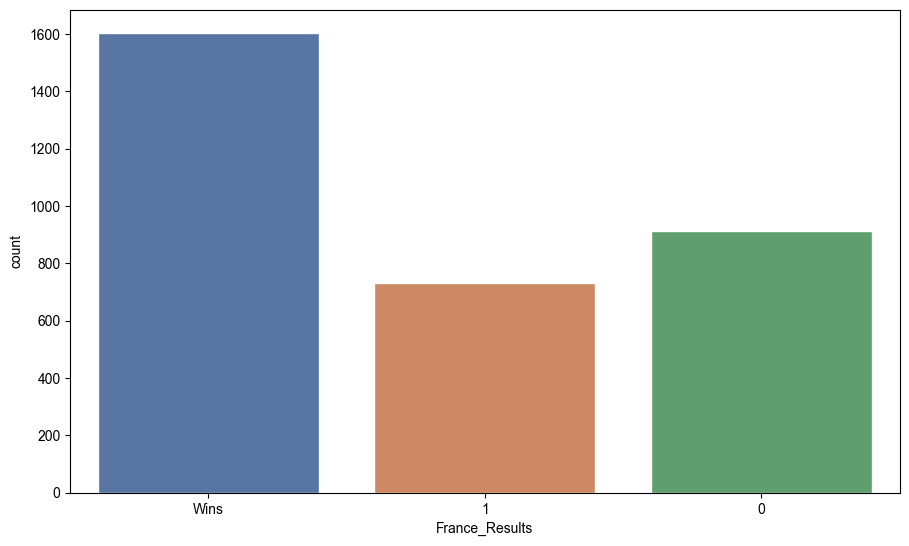

In [26]:
wins = []
for row in df['result']:
    if row != 1 and row != 0 :
        wins.append('Wins')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=['France_Results'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='France_Results', data=winsdf)

In [27]:
del df['neutral_location']
del df['tournament']
del df['home_team_total_fifa_points']
del df['away_team_total_fifa_points']


In [28]:
del df['away_team_score']

In [29]:
del df['home_team_score']

In [30]:
df

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,fifa_rank_delta,offense/defense_ratio,result
2,1993-08-08,Ecuador,Venezuela,35,94,71.645833,69.000000,70.475926,75.477083,74.929167,71.669231,75.260000,74.592308,59,1.053131,2
10,1993-08-15,Australia,Canada,52,46,78.509091,74.200000,72.152727,73.863636,74.236364,69.270000,71.673333,74.040000,-6,1.066315,2
14,1993-08-15,Uruguay,Brazil,22,8,79.215190,87.596154,79.593671,83.616456,78.277215,86.150000,87.326923,85.873077,-14,0.970591,1
15,1993-08-22,Argentina,Peru,5,70,80.960000,68.789474,83.172000,88.237333,84.616000,72.505556,75.793750,73.976471,65,1.216973,2
17,1993-08-22,Brazil,Ecuador,8,35,86.154930,71.346939,86.207042,87.119718,85.947887,70.779630,75.285714,74.955102,27,1.230859,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23586,2022-03-29,Ecuador,Argentina,44,4,71.000000,84.000000,73.500000,76.000000,74.500000,82.200000,89.000000,84.000000,-40,0.924574,1
23588,2022-03-29,Bolivia,Brazil,76,2,70.000000,89.000000,68.800000,68.300000,68.800000,84.800000,86.300000,85.500000,-74,0.805425,0
23590,2022-03-29,Chile,Uruguay,26,16,79.000000,80.000000,75.500000,76.700000,78.200000,81.200000,84.300000,80.000000,-10,0.944581,0
23631,2022-03-30,Costa Rica,USA,42,13,88.000000,77.000000,71.500000,70.300000,69.200000,75.800000,77.700000,75.800000,-29,0.927441,2


In [ ]:
df.to_csv('df_clean.csv', encoding='utf-8', index=False)

# Optimize prediction with new cleaning

In [31]:
df2 = df

In [57]:
df.result.value_counts()

Win     282
Lose    206
Draw    104
Name: result, dtype: int64

In [35]:
dff = df2.drop((df2.loc[df2.result == 2].sample(600)).index)

In [36]:
dff.result.value_counts()

0    913
2    879
1    731
Name: result, dtype: int64

In [37]:
dff.to_csv('df_clean_v2.csv', encoding='utf-8', index=False)